# Introduction

This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.


**Data sources:**

`profiles.csv` was provided by Codecademy.com.

## Scoping

It's beneficial to create a project scope whenever a new project is being started. Below are four sections to help guide the project process and progress. The first section is the project goals, a section to define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and aligning the question(s) with the project goals. Lastly, evaluation will help build conclusions and findings from the analysis.

### Project Goals

In this project, the goal is to utilize the skills learned through Codecademy and apply machine learning techniques to a data set. The primary research question that will be answered is whether an OkCupid's user astrological sign can be predicted using other variables from their profiles. This project is important since many users find astrological signs an important part of matches, and if users don't input their sign, OkCupid would like to predict which sign they might be. 


### Data

The project has one data set provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's astrological signs, classification algorithms from the supervised learning family of machine learning models will be implemented. 

### Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores. 


In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

## Loading the Data

To analyze the user profiles from OkCupid, pandas will be used to load the dataset into a `DataFrame` so that it can be explored and visualized with Python.

Here `profiles.csv` is loaded into a `DataFrame` called `profiles`. The `DataFrame` is then briefly examined using `.head()` to check the contents.

In [2]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


## Inspecting the data

In [3]:
profiles.age.head(5)

0    22
1    35
2    38
3    23
4    29
Name: age, dtype: int64

In [4]:
profiles.last_online.head(5)

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

In [5]:
profiles.essay2.head(5)

0    making people laugh.<br />\nranting about a go...
1    being silly. having ridiculous amonts of fun w...
2    improvising in different contexts. alternating...
3    playing synthesizers and organizing books acco...
4    creating imagery to look at:<br />\nhttp://bag...
Name: essay2, dtype: object

### Data Characteristics

`profiles` has 59,946 rows and 31 columns, this is a good sign since there seems to be enough data for machine learning. 

In [6]:
list(profiles.columns) 

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…


### What type of variables are in this dataset?

In [7]:
datadict = pd.DataFrame(profiles.dtypes)
datadict

,0
age,int64
body_type,object
diet,object
drinks,object
drugs,object
education,object
essay0,object
essay1,object
essay2,object
essay3,object


### Is any data missing?

Text(0.5, 1.0, 'Missing values heatmap')

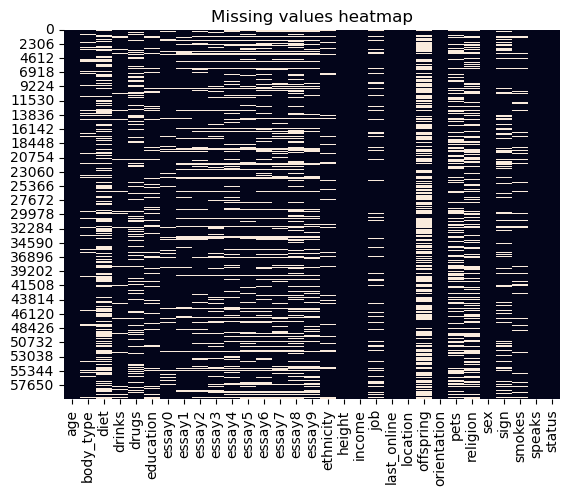

In [8]:
profiles.isnull().sum()
sns.heatmap(profiles.isnull(), cbar = False).set_title("Missing values heatmap")

In [9]:
# identify missing values of the  columns, add the stats to the datadict
profiles.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

#### There is no missing data for these columns: age, income, last_online, location, orientation, sex, and status. There are only 3 instances of missing data for the height column. The rest of the columns have a substantial amount of missing data.

## Explore the Data

First to be explored is the number of unique signs, and the values. It seems that there are 48, but there should only be 12 signs. Upon closer inspection, there seems to be qualifiers attached with the signs. 

In [10]:
print("Number of categories of astrological signs:",profiles.sign.nunique())
print('\n')
print("categories:", profiles.sign.unique())

Number of categories of astrological signs: 48


categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t 

In [11]:
print(profiles.income.tail(20))

59926        -1
59927     50000
59928        -1
59929        -1
59930     70000
59931        -1
59932        -1
59933        -1
59934     80000
59935        -1
59936        -1
59937        -1
59938        -1
59939        -1
59940        -1
59941        -1
59942        -1
59943    100000
59944        -1
59945        -1
Name: income, dtype: int64


#### The Income column has lots of "-1".  This will need to change to "0".

In [12]:
print(profiles.status.head(160))

0         single
1         single
2      available
3         single
4         single
         ...    
155       single
156       single
157       single
158       single
159       single
Name: status, Length: 160, dtype: object


In [13]:
print("Number of statuses:",profiles.status.nunique())

Number of statuses: 5


In [14]:
print("There are 5 different status answers.")
print('\n')
print(profiles.status.value_counts())
print('\n')
print("There are 59,946 total number of answers.")
print(profiles.status.count())
print('\n')
print("Less than 1% of the registered users on this app are married:")
print(310 / profiles.status.count())
print('\n')
print("%92 of the registered users on this app are single.")
print(55697 / profiles.status.count())

There are 5 different status answers.


status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64


There are 59,946 total number of answers.
59946


Less than 1% of the registered users on this app are married:
0.005171320855436559


%92 of the registered users on this app are single.
0.9291195409201615


## Clean the Data

### Alter 48 astrological signs to be just 12 astrological signs.

In [15]:
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0)
print("number of categories:",profiles.signsCleaned.nunique())
print("categories:", profiles.signsCleaned.unique())

profiles.signsCleaned.value_counts()

number of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


signsCleaned
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64

In [16]:
print(str(profiles.income).isdigit())

False


### Replace -1 with 0 in the status column...

In [17]:
profiles.loc[profiles['income']<0,'income']=0

In [18]:
print(profiles.income.tail(20))

59926         0
59927     50000
59928         0
59929         0
59930     70000
59931         0
59932         0
59933         0
59934     80000
59935         0
59936         0
59937         0
59938         0
59939         0
59940         0
59941         0
59942         0
59943    100000
59944         0
59945         0
Name: income, dtype: int64


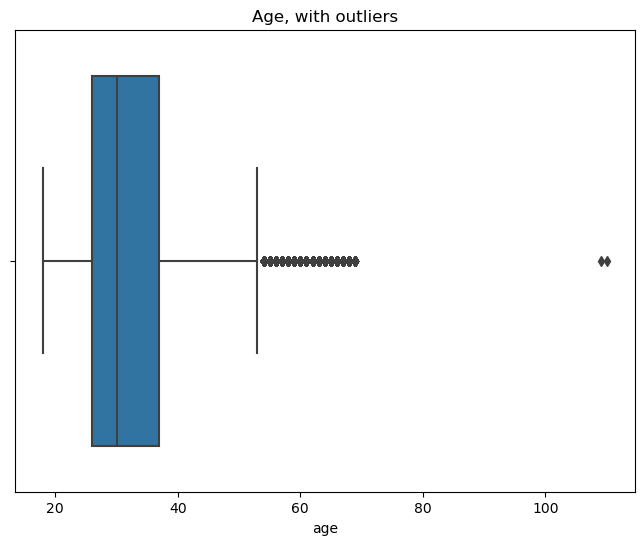

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=profiles.age)
plt.title('Age, with outliers')
plt.show()

#### There are two outliers in the age column. Since this is a dating app, and the two outliers, for age, are over 100, and elderly people don't tend to use dating apps, let's assume that these were entered erroneously. I will change these two outlier numbers to 32, which is the current avg age for users of this app.

In [20]:
profiles.loc[profiles['age']>100,'age']=32

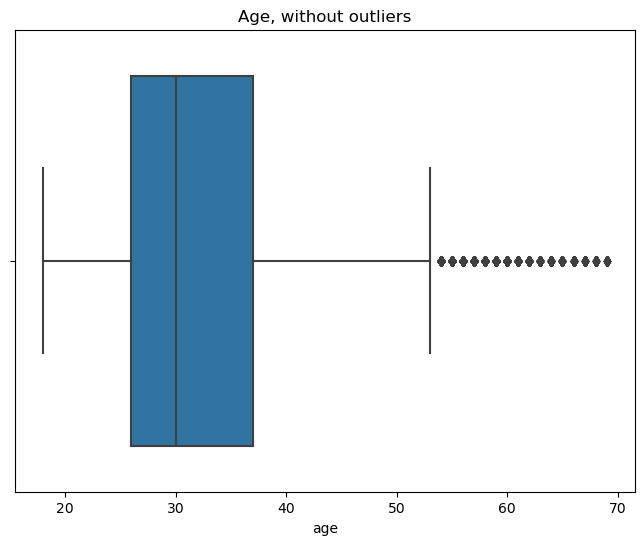

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=profiles.age)
plt.title('Age, without outliers')
plt.show()

#### Now, ages 54 and greater are the outliers.  Removing the two outliers that were over 100, has changed the avg age of users. Let's see what the avg age is now.

In [22]:
print(profiles.describe())

                age        height          income
count  59946.000000  59943.000000    59946.000000
mean      32.337704     68.295281    20034.030628
std        9.442266      3.994803    97346.025793
min       18.000000      1.000000        0.000000
25%       26.000000     66.000000        0.000000
50%       30.000000     68.000000        0.000000
75%       37.000000     71.000000        0.000000
max       69.000000     95.000000  1000000.000000


### Age

/Users/wranglerdeb/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


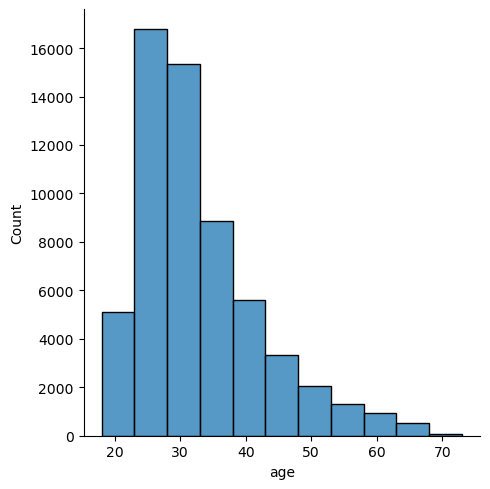

In [23]:
sns.displot(data=profiles, x="age", kind="hist", binwidth = 5);

/Users/wranglerdeb/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


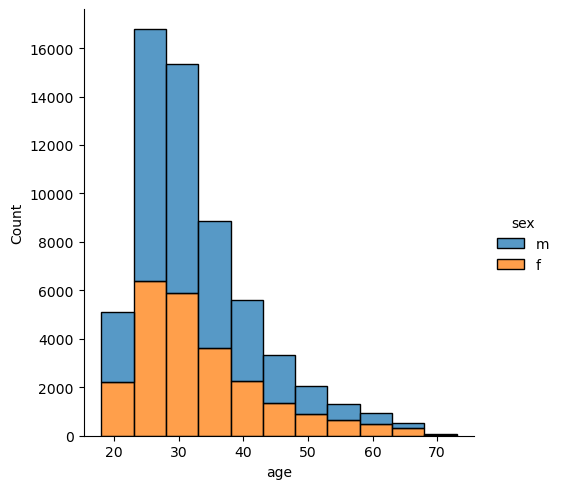

In [24]:
sns.displot(data=profiles, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack");

#### The average age of OK Cupid users is 32 years old. 

### Height

/Users/wranglerdeb/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


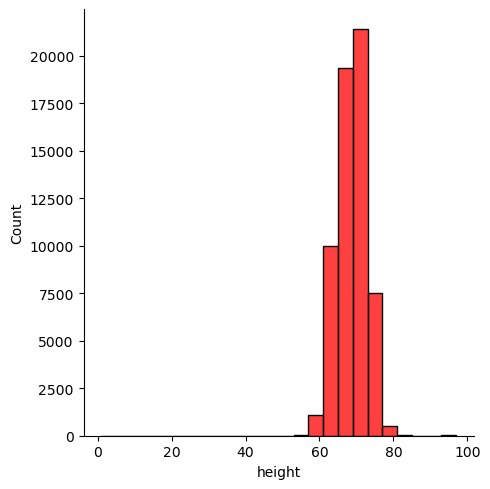

In [25]:
sns.displot(data=profiles, x="height", kind="hist", binwidth = 4, color="red");

/Users/wranglerdeb/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


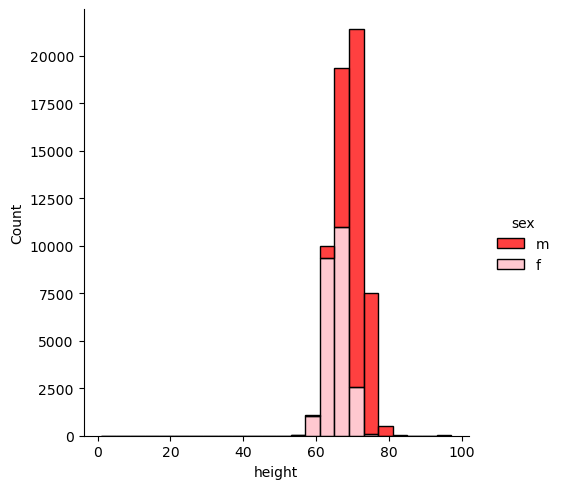

In [26]:
palette = ["#FF0000", "#FFB6C1"]
sns.displot(data=profiles, x="height",hue="sex", kind="hist", binwidth = 4, multiple = "stack", palette=sns.color_palette(palette, len(palette)));

#### The average height of OK Cupid users is 68 inches, which is 5 feet 8 inches.

### Income

/Users/wranglerdeb/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


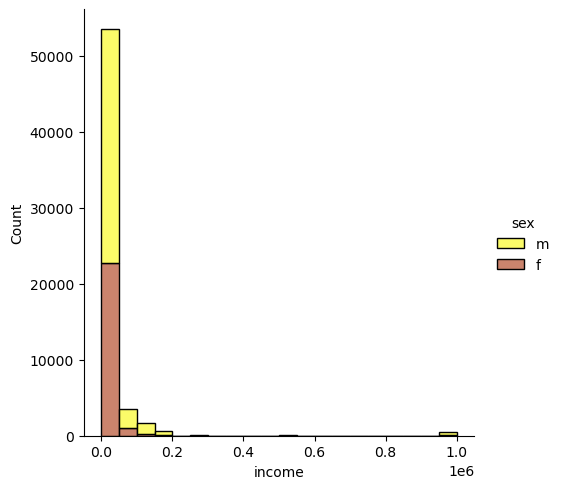

In [27]:
palette2 = ["#FAFA37", "#BA5B3C"]
sns.displot(data=profiles, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack", palette=sns.color_palette(palette2, len(palette2)));

#### On average, women using the OK Cupid app earn half as much money as men.

In [28]:
print(profiles.smokes.tail(50))
print('\n')
print("There are " + str(profiles.smokes.nunique()) + " unique answers for the 'smokes' column.")
print("Those ansers are: yes, no, sometimes, when drinking, trying to quit.")

59896                no
59897                no
59898               yes
59899     when drinking
59900                no
59901                no
59902               yes
59903         sometimes
59904                no
59905                no
59906                no
59907         sometimes
59908               NaN
59909                no
59910                no
59911               NaN
59912               yes
59913                no
59914                no
59915                no
59916                no
59917                no
59918               yes
59919               NaN
59920                no
59921               NaN
59922                no
59923         sometimes
59924                no
59925                no
59926                no
59927                no
59928     when drinking
59929                no
59930                no
59931                no
59932               yes
59933               NaN
59934                no
59935     when drinking
59936                no
59937           

In [29]:
profiles['smokes'] = profiles['smokes'].fillna('no')

In [66]:
print(profiles.smokes.tail(50))

59896                no
59897                no
59898               yes
59899     when drinking
59900                no
59901                no
59902               yes
59903         sometimes
59904                no
59905                no
59906                no
59907         sometimes
59908                no
59909                no
59910                no
59911                no
59912               yes
59913                no
59914                no
59915                no
59916                no
59917                no
59918               yes
59919                no
59920                no
59921                no
59922                no
59923         sometimes
59924                no
59925                no
59926                no
59927                no
59928     when drinking
59929                no
59930                no
59931                no
59932               yes
59933                no
59934                no
59935     when drinking
59936                no
59937           

#### I will change this to a binary, where the answers are either "yes" or "no".

In [34]:
profiles['smokes_cleaned'] = np.where((profiles['smokes']!= 'no'), 'yes', profiles['smokes'])


In [33]:
print(profiles.smokes_cleaned.tail(50))

59896     no
59897     no
59898    yes
59899    yes
59900     no
59901     no
59902    yes
59903    yes
59904     no
59905     no
59906     no
59907    yes
59908     no
59909     no
59910     no
59911     no
59912    yes
59913     no
59914     no
59915     no
59916     no
59917     no
59918    yes
59919     no
59920     no
59921     no
59922     no
59923    yes
59924     no
59925     no
59926     no
59927     no
59928    yes
59929     no
59930     no
59931     no
59932    yes
59933     no
59934     no
59935    yes
59936     no
59937     no
59938     no
59939     no
59940     no
59941     no
59942     no
59943     no
59944    yes
59945    yes
Name: smokes_cleaned, dtype: object


In [35]:
print(profiles.smokes_cleaned.value_counts())

smokes_cleaned
no     49408
yes    10538
Name: count, dtype: int64


In [49]:
print("Of the " + str(len(profiles.smokes)) + " smokers, " + str(profiles['smokes_cleaned'].value_counts()['yes'] ) + " are smokers.")

Of the 59946 smokers, 10538 are smokers.


In [56]:
smokers_percent = profiles['smokes_cleaned'].value_counts()['yes']  / len(profiles.smokes) * 100

In [63]:
print("%" + str(round(smokers_percent, 2) ) + " of the people are smokers.")

%17.58 of the people are smokers.


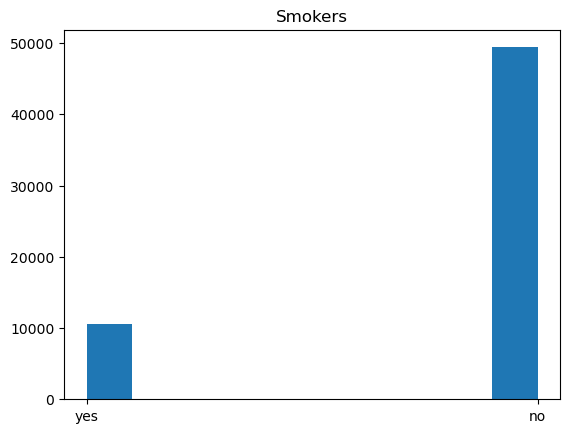

In [66]:
plt.hist(profiles.smokes_cleaned)
plt.title("Smokers")
plt.show()